In [1]:
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from doe_modules.design import CLOO, PlackettBurman, FullFactorial
from doe_modules.plot import correlation_heatmap, design_heatmap, bio_scatterview
from doe_modules.preferences import kwarg_savefig, outputdir, heatmap_pref, dsmat_pref
from doe_modules.preferences.cmap import sim1
from doe_modules.simulation import Sim1, MLR

In [2]:
class Config(NamedTuple):
    savefig: bool = True
    out: str = outputdir

conf = Config()

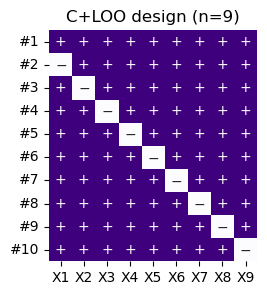

In [3]:
fig, ax = plt.subplots(figsize=(3, 3))

n_factor = 9

design_heatmap(
    design=CLOO, n_factor=n_factor, ax=ax, **dsmat_pref
)

if conf.savefig:
    fig.savefig(f"{conf.out}/n={n_factor}", **kwarg_savefig)

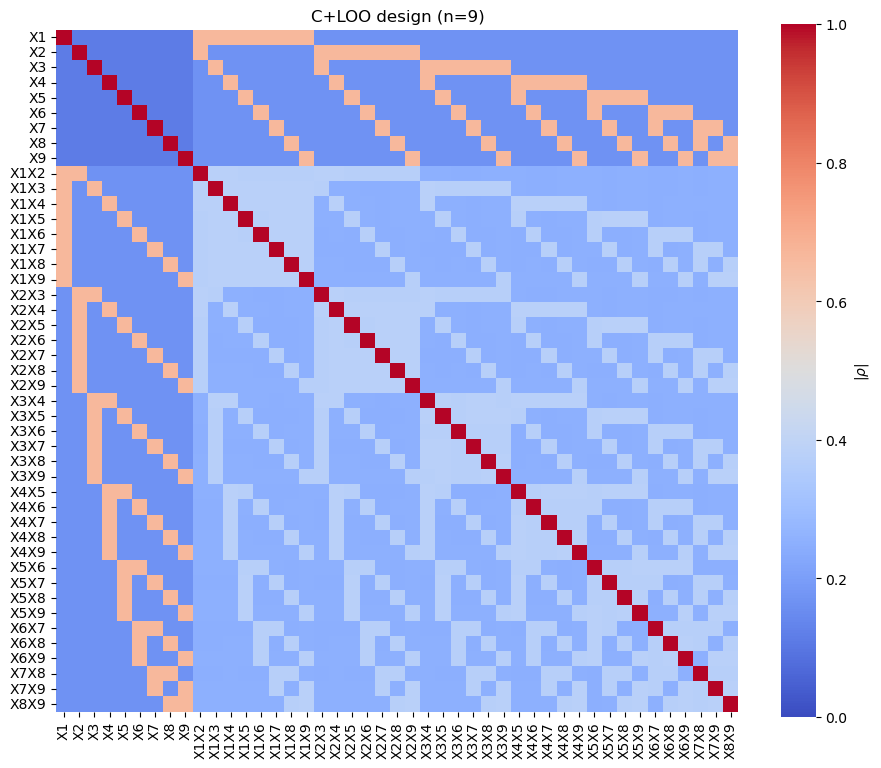

In [4]:
fig, ax = plt.subplots(figsize=(11, 9))

correlation_heatmap(
    design=CLOO, n_factor=9, ax=ax, **heatmap_pref
)

if conf.savefig:
    fig.savefig(f"{conf.out}/corr_n={n_factor}", **kwarg_savefig)

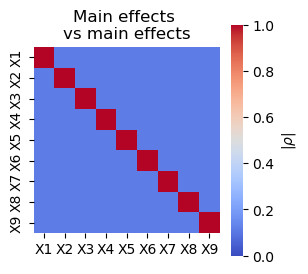

In [5]:
fig, ax = plt.subplots(figsize=(3, 3))

sns.heatmap(
    CLOO().get_exmatrix(9)().corr().abs(), ax=ax, **heatmap_pref
)

ax.set(title="Main effects \nvs main effects")

if conf.savefig:
    fig.savefig(f"{conf.out}/main_n={n_factor}", **kwarg_savefig)

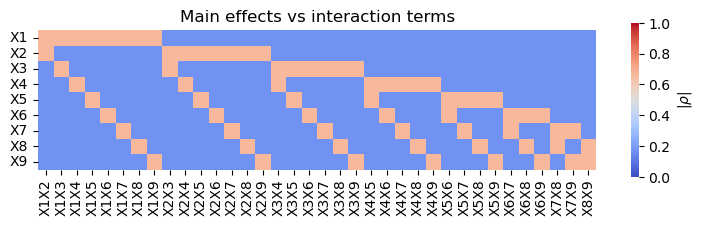

In [6]:
fig, ax = plt.subplots(figsize=(9, 2))

sns.heatmap(
    CLOO().get_exmatrix(9).interactions().corr().abs().iloc[:9, 9:], 
    ax=ax, **heatmap_pref
)

ax.set(title="Main effects vs interaction terms")

if conf.savefig:
    fig.savefig(f"{conf.out}/m&i_n={n_factor}", **kwarg_savefig)

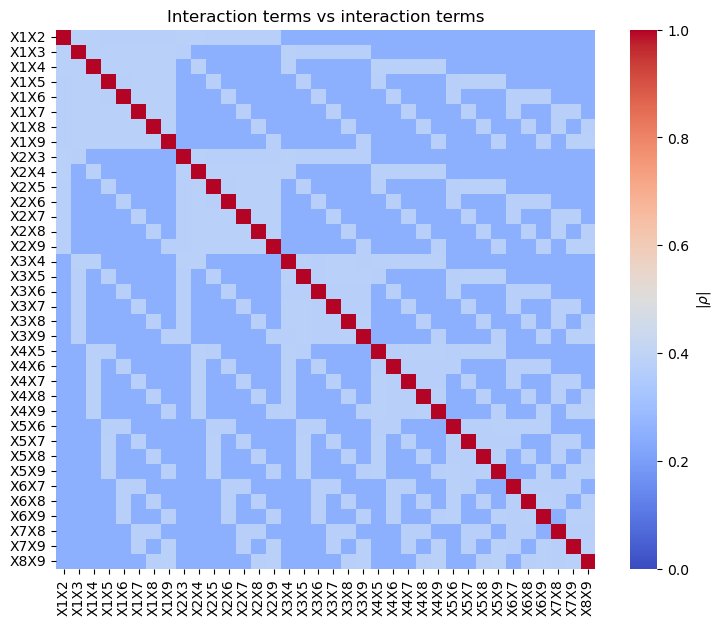

In [7]:
fig, ax = plt.subplots(figsize=(9, 7))

sns.heatmap(
    CLOO().get_exmatrix(9).interactions().corr().abs().iloc[9:, 9:], 
    ax=ax, **heatmap_pref
)

ax.set(title="Interaction terms vs interaction terms")

if conf.savefig:
    fig.savefig(f"{conf.out}/interaction_n={n_factor}", **kwarg_savefig)

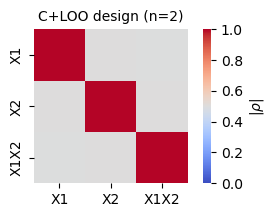

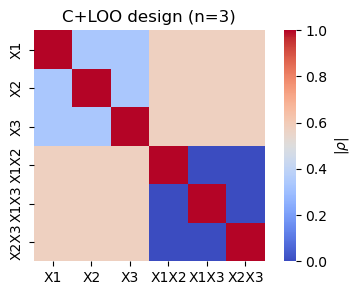

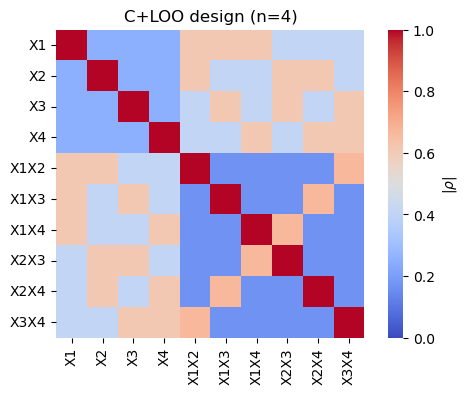

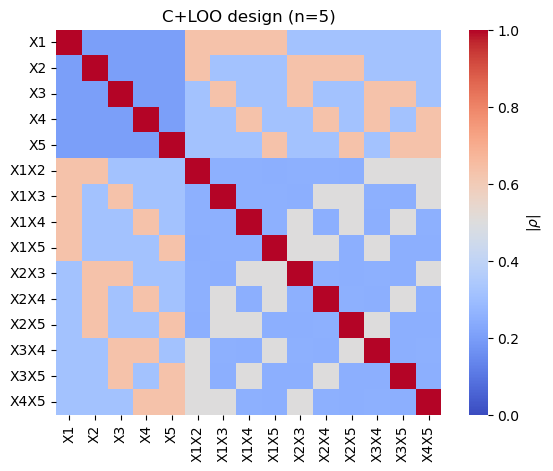

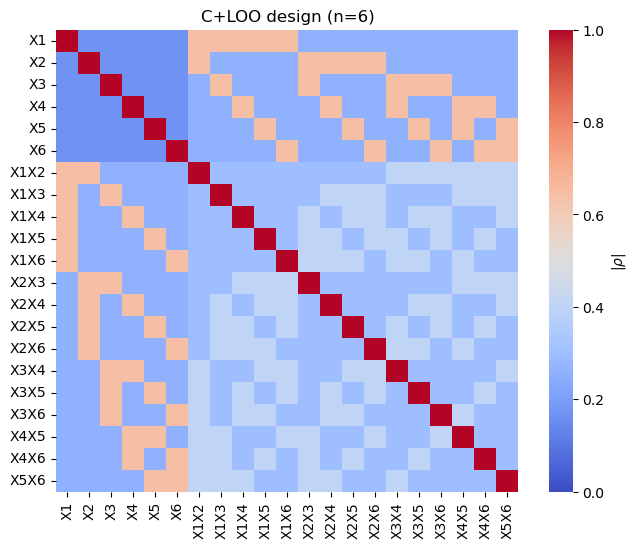

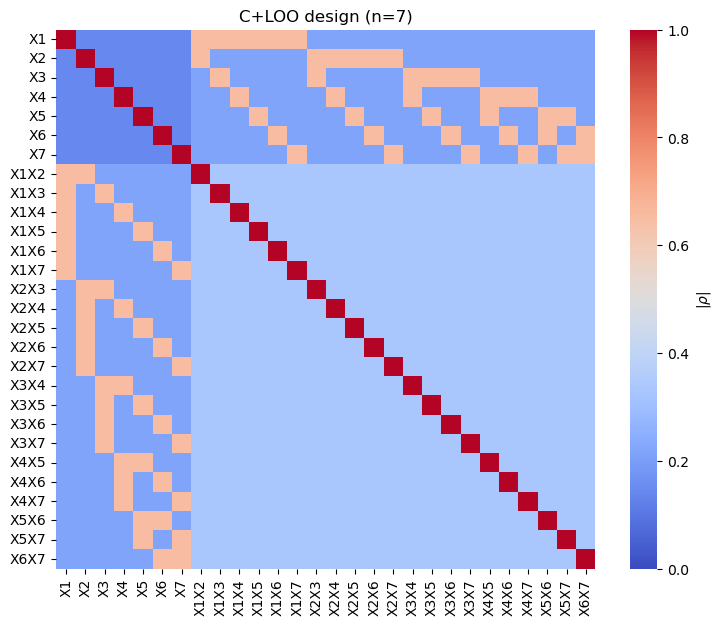

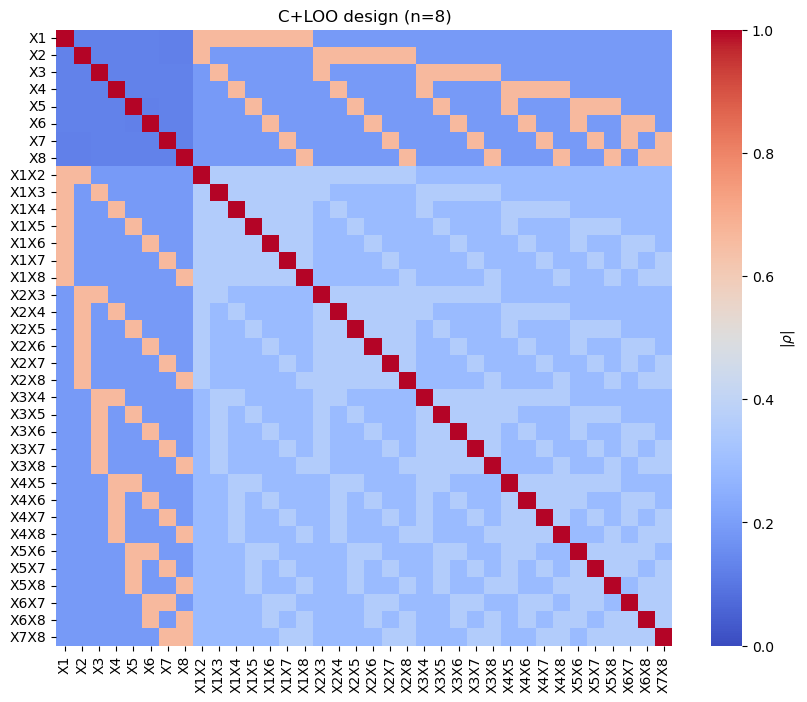

In [8]:
for n_f in [2, 3, 4, 5, 6, 7, 8]:
    fig, ax = plt.subplots(figsize=(n_f+2, n_f))

    correlation_heatmap(
        design=CLOO, n_factor=n_f, ax=ax, **heatmap_pref
    )
    ax.set_title(f"C+LOO design (n={n_f})", fontsize="medium" if n_f == 2 else "large")
    
    if conf.savefig:
        fig.savefig(f"{conf.out}/n={n_f}", **kwarg_savefig)

In [9]:
def main1_1(x: int) -> float:
    return 1 if x >= 1 else np.nan

def main1_2(x: int) -> float:
    return - 1 / x if x >= 2 else np.nan

def main1_int12(x: int) -> float:
    return np.sqrt((x - 1) / (2 * x)) if x >= 2 else np.nan

def main1_int23(x: int) -> float:
    return -np.sqrt(2 / (x * (x - 1))) if x >= 3 else np.nan

def int12_12(x: int) -> float:
    return 1 if x >= 1 else np.nan

def int12_13(x: int) -> float:
    return (x - 3) / (2 * (x - 1)) if x >= 3 else np.nan

def int12_34(x: int) -> float:
    return -2 / (x - 1) if x >= 4 else np.nan

In [10]:
m1m1 = np.vectorize(main1_1)
m1m2 = np.vectorize(main1_2)
m1i12 = np.vectorize(main1_int12)
m1i23 = np.vectorize(main1_int23)
i12i12 = np.vectorize(int12_12)
i12i13 = np.vectorize(int12_13)
i12i34 = np.vectorize(int12_34)

In [11]:
n = np.arange(25) + 1

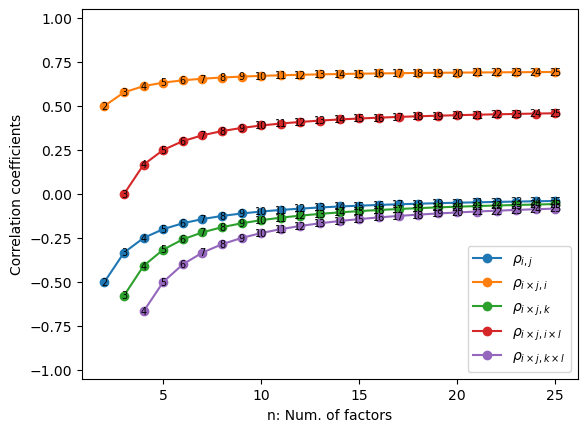

In [12]:
fig, ax = plt.subplots()

# ax.plot(n, m1m1(n), label=r"$\rho_{i,i}$", marker="o")
ax.plot(n, m1m2(n), label=r"$\rho_{i,j}$", marker="o")
ax.plot(n, m1i12(n), label=r"$\rho_{i\times j,i}$", marker="o")
ax.plot(n, m1i23(n), label=r"$\rho_{i\times j,k}$", marker="o")
# ax.plot(n, i12i12(n), label=r"$\rho_{i\times j,i\times j}$", marker="o")
ax.plot(n, i12i13(n), label=r"$\rho_{i\times j,i\times l}$", marker="o")
ax.plot(n, i12i34(n), label=r"$\rho_{i\times j,k\times l}$", marker="o")

for f in [m1m2, m1i12, m1i23, i12i13, i12i34]:
    for x, y in zip(n, f(n)):
        if not np.isnan(y):
            ax.text(x, y, x, size=7, ha="center", va="center")

ax.set_ylim(-1.05, 1.05)
ax.legend()
ax.set(ylabel="Correlation coefficients", xlabel="n: Num. of factors")

if conf.savefig:
        fig.savefig(f"{conf.out}/corr", **kwarg_savefig)

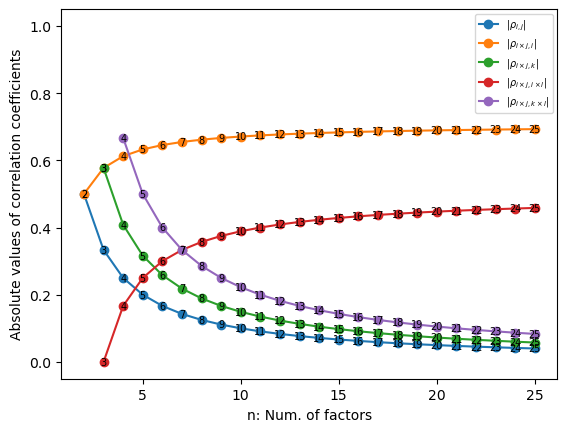

In [13]:
fig, ax = plt.subplots()

# ax.plot(n, np.abs(m1m1(n)), label=r"$|\rho_{i,i}|$", marker="o")
ax.plot(n, np.abs(m1m2(n)), label=r"$|\rho_{i,j}|$", marker="o")
ax.plot(n, np.abs(m1i12(n)), label=r"$|\rho_{i\times j,i}|$", marker="o")
ax.plot(n, np.abs(m1i23(n)), label=r"$|\rho_{i\times j,k}|$", marker="o")
# ax.plot(n, np.abs(i12i12(n)), label=r"$|\rho_{i\times j,i\times j}|$", marker="o")
ax.plot(n, np.abs(i12i13(n)), label=r"$|\rho_{i\times j,i\times l}|$", marker="o")
ax.plot(n, np.abs(i12i34(n)), label=r"$|\rho_{i\times j,k\times l}|$", marker="o")

for f in [m1m2, m1i12, m1i23, i12i13, i12i34]:
    for x, y in zip(n, np.abs(f(n))):
        if not np.isnan(y):
            ax.text(x, y, x, size=7, ha="center", va="center")

ax.set_ylim(-.05, 1.05)
ax.legend(fontsize="x-small")
ax.set(ylabel="Absolute values of correlation coefficients", xlabel="n: Num. of factors")

if conf.savefig:
        fig.savefig(f"{conf.out}/corr_abs", **kwarg_savefig)

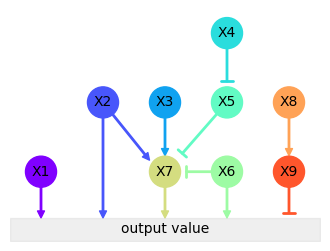

In [14]:
fig, ax = plt.subplots(figsize=(4, 3))

Sim1().plot(ax=ax)

if conf.savefig:
    fig.savefig(f"{conf.out}/sim_model", **kwarg_savefig)

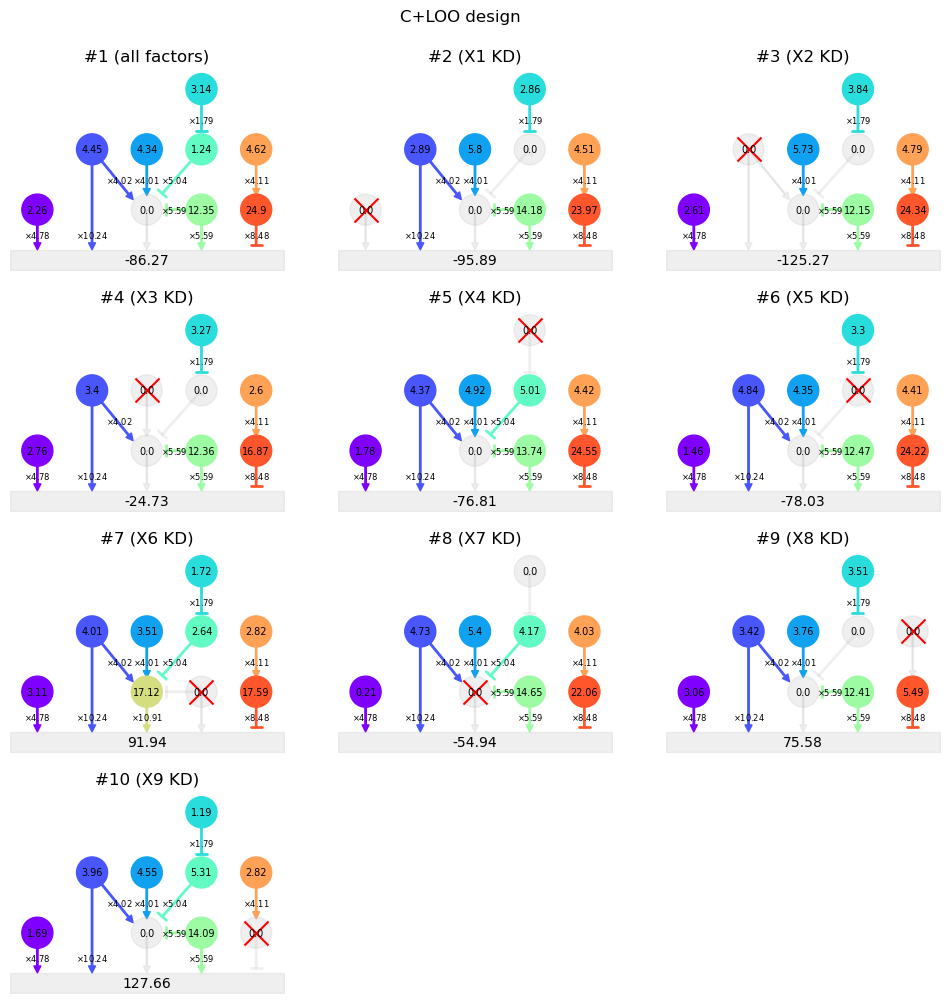

In [15]:
fig, ax = plt.subplots(4, 3, figsize=(12, 12))

model = Sim1()
model.simulate(
    design=CLOO, plot=True, ax=ax,
    titles=[
        f"#{i + 1} ({'all factors' if i == 0 else f'X{i} KD'})" for i in range(model.n_factor + 1)
    ]
)

fig.suptitle(f"{model.design().name} design", y=.93)

if conf.savefig:
    fig.savefig(f"{conf.out}/sim", **kwarg_savefig)

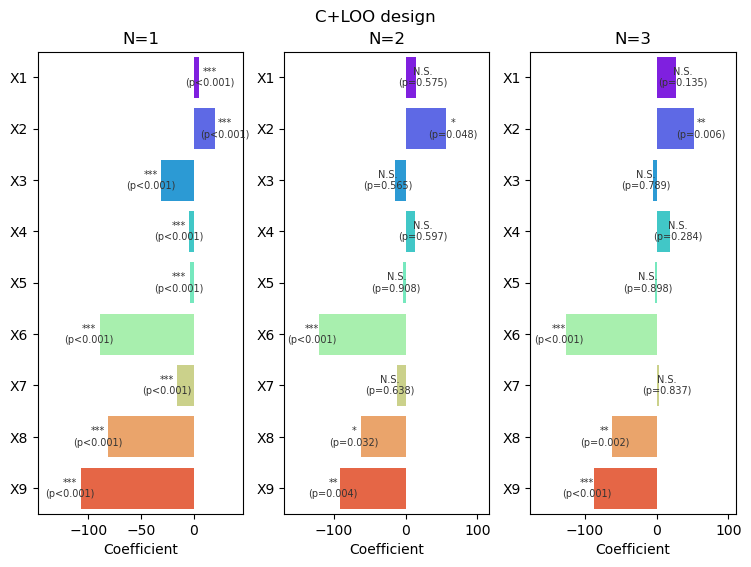

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(9, 6))

for i, a in enumerate(ax):
    model.simulate(n_rep=i + 1)
    mlr = MLR(model)
    mlr.plot(ax=a, cmap=sim1)

fig.suptitle(f"{model.metadata['design']} design", y=.95)

if conf.savefig:
    fig.savefig(f"{conf.out}/sim_mlr", **kwarg_savefig)

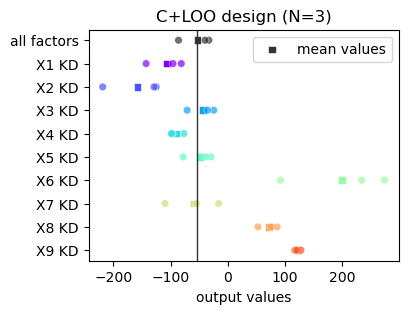

In [17]:
fig, ax = plt.subplots(figsize=(4, 3))

bio_scatterview(model, cmap=sim1, ax=ax)

if conf.savefig:
    fig.savefig(f"{conf.out}/sim_res_n={model.metadata['n_rep']}_intuitive", **kwarg_savefig)

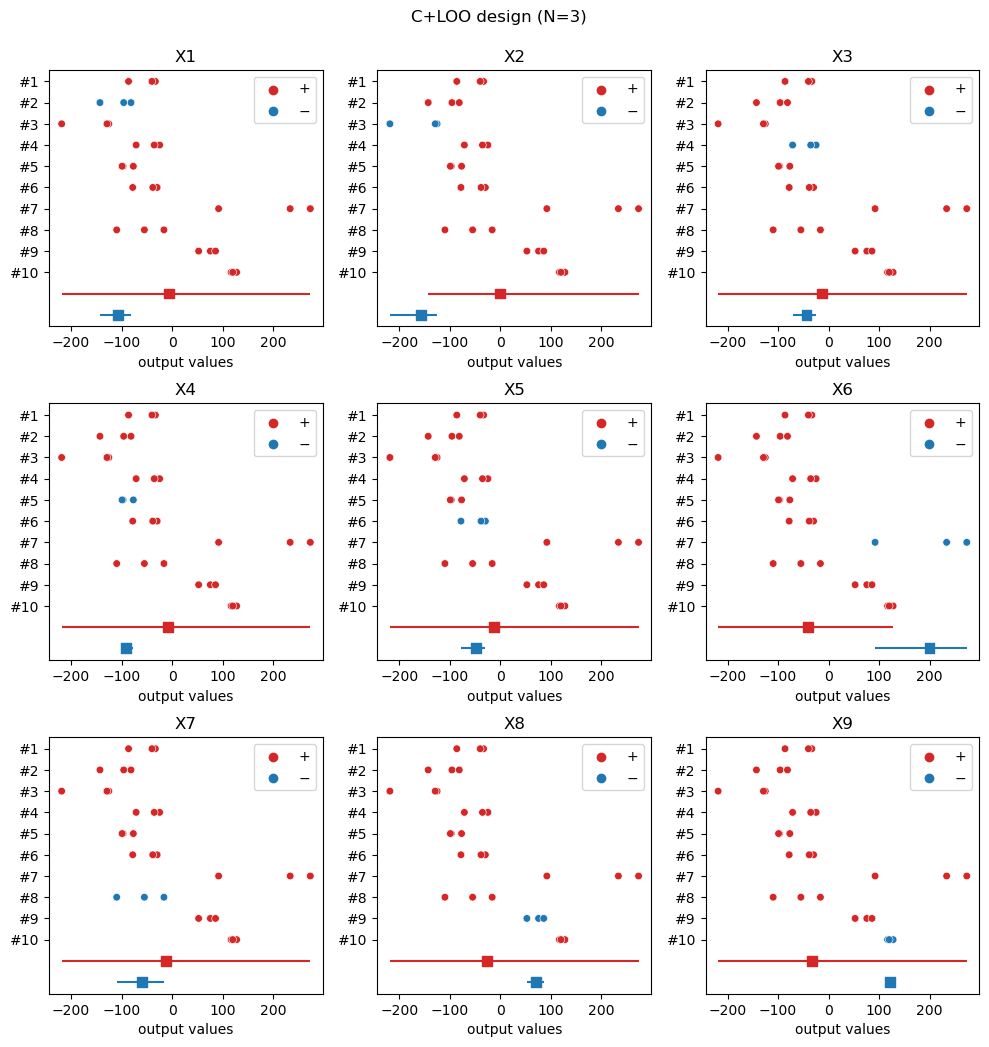

In [18]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=.3)

model.scatterview(ax=ax)
[a.legend(loc="upper right") for a in ax.ravel()]

fig.suptitle(f"{model.metadata['design']} design (N={model.metadata['n_rep']})", y=.93);

if conf.savefig:
    fig.savefig(f"{conf.out}/sim_res_n={model.metadata['n_rep']}", **kwarg_savefig)

---
# PB

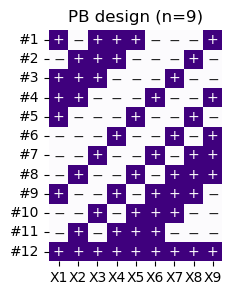

In [19]:
fig, ax = plt.subplots(figsize=(3, 3))

n_factor = 9

design_heatmap(
    design=PlackettBurman, n_factor=n_factor, ax=ax,
    **dsmat_pref
)

if conf.savefig:
    fig.savefig(f"{conf.out}/pb_n={n_factor}", **kwarg_savefig)

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))

correlation_heatmap(
    design=PlackettBurman, n_factor=9, ax=ax,
    **heatmap_pref
)

if conf.savefig:
    fig.savefig(f"{conf.out}/pb_corr_n={n_factor}", **kwarg_savefig)

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(12, 12))

model = Sim1()
model.simulate(
    design=PlackettBurman, plot=True, ax=ax
)

fig.suptitle(f"{model.design().name} design", y=.93)

if conf.savefig:
    fig.savefig(f"{conf.out}/pb_sim", **kwarg_savefig)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(9, 6))

for i, a in enumerate(ax):
    model.simulate(n_rep=i + 1)
    MLR(model).plot(ax=a, cmap=sim1)

fig.suptitle(f"{model.metadata['design']} design", y=.95)

if conf.savefig:
    fig.savefig(f"{conf.out}/pb_sim_mlr", **kwarg_savefig)

In [34]:
mlr.result.params.filter(regex="X6")

X6      -1.475677
X1X6    -9.641352
X2X6    -4.636666
X3X6   -19.244356
X4X6    11.836785
X5X6    14.778512
X6X7    -2.631803
X6X8     3.424457
X6X9     6.317732
dtype: float64

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(9, 6))

for i, a in enumerate(ax):
    model.simulate(n_rep=i + 1)
    mlr = MLR(model, interactions=True)
    mlr.plot(ax=a, cmap=sim1)

fig.suptitle(f"{model.metadata['design']} design", y=.95)

# if conf.savefig:
#     fig.savefig(f"{conf.out}/pb_sim_mlr", **kwarg_savefig)

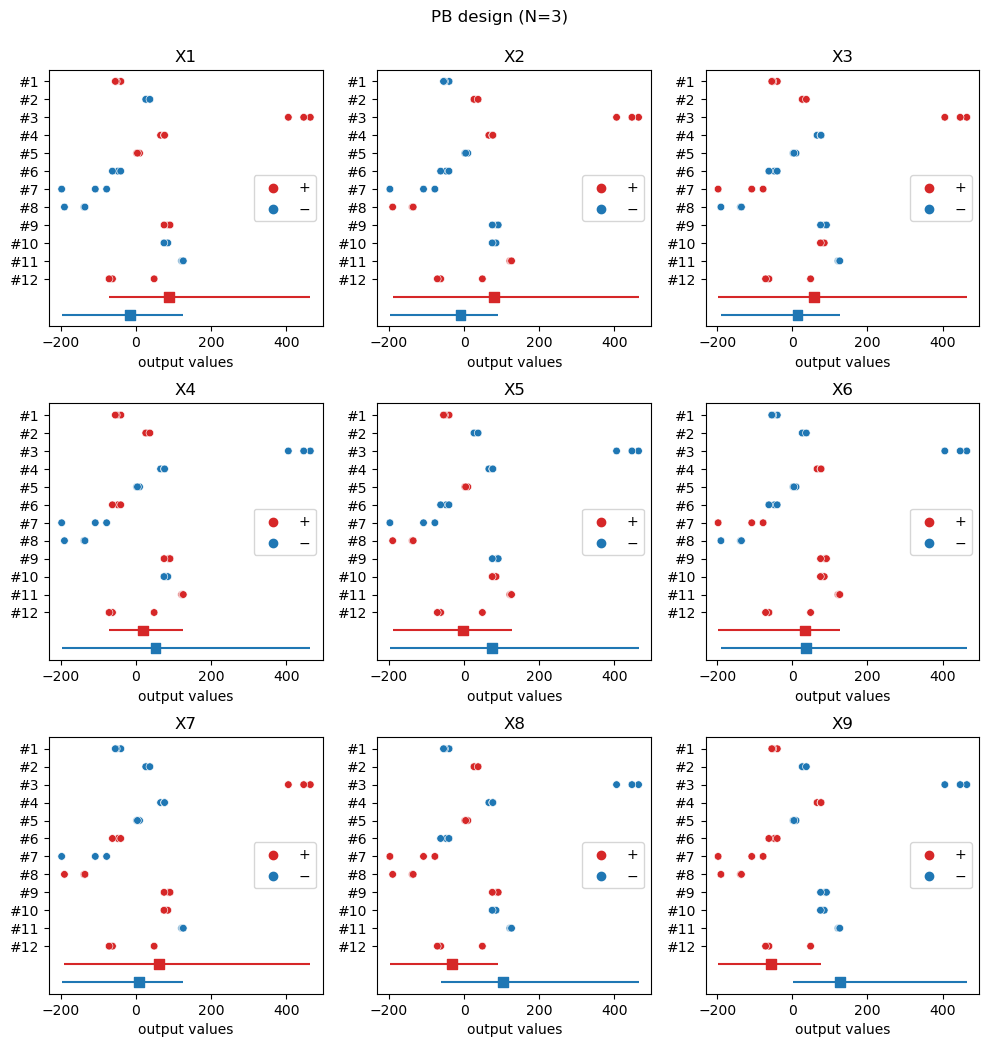

In [30]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=.3)

model.scatterview(ax=ax)

fig.suptitle(f"{model.metadata['design']} design (N={model.metadata['n_rep']})", y=.93);

if conf.savefig:
    fig.savefig(f"{conf.out}/pb_sim_res_n={model.metadata['n_rep']}", **kwarg_savefig)

---
# Full Factorial

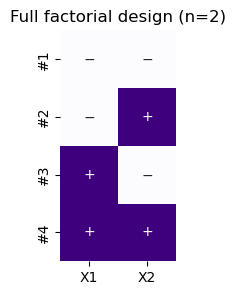

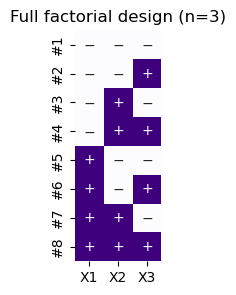

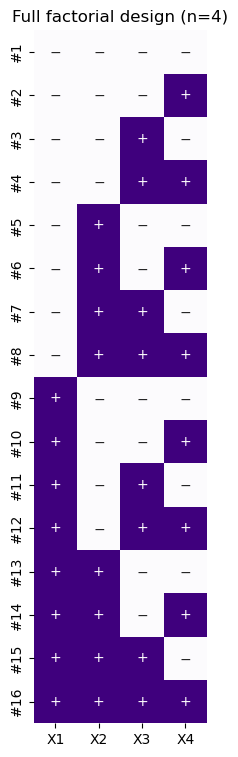

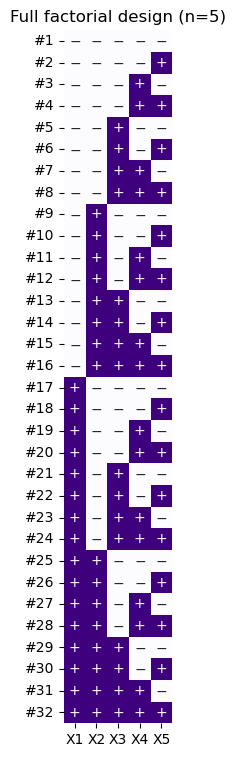

In [31]:
for n_factor in np.arange(2, 6):
    
    figsize = [(3, 3)] * 2 + [(3, 9)] * 2

    fig, ax = plt.subplots(figsize=figsize[n_factor - 2])

    design_heatmap(
        design=FullFactorial, n_factor=n_factor, ax=ax,
        **dsmat_pref
    )

    if conf.savefig:
        fig.savefig(f"{conf.out}/ff_n={n_factor}", **kwarg_savefig)

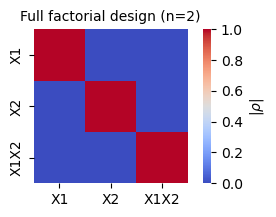

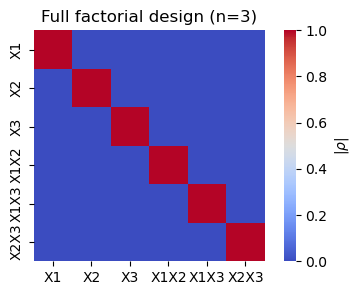

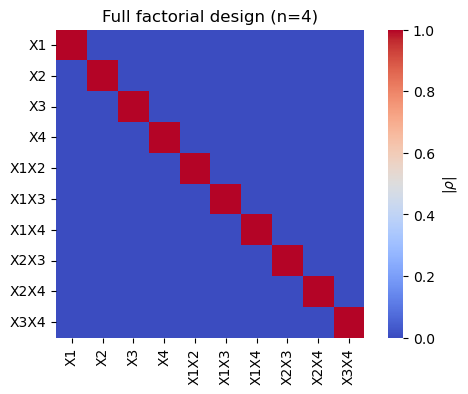

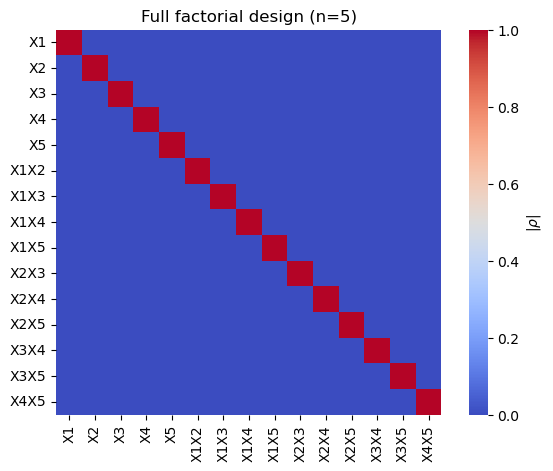

In [32]:
for n_f in np.arange(2, 6):
    fig, ax = plt.subplots(figsize=(n_f+2, n_f))

    correlation_heatmap(
        design=FullFactorial, n_factor=n_f, ax=ax,
        **heatmap_pref
    )
    ax.set_title(f"Full factorial design (n={n_f})", fontsize="medium" if n_f == 2 else "large")
    
    if conf.savefig:
        fig.savefig(f"{conf.out}/ff_corr_n={n_f}", **kwarg_savefig)

In [20]:
model = Sim1()
model.simulate(design=FullFactorial, plot=False)

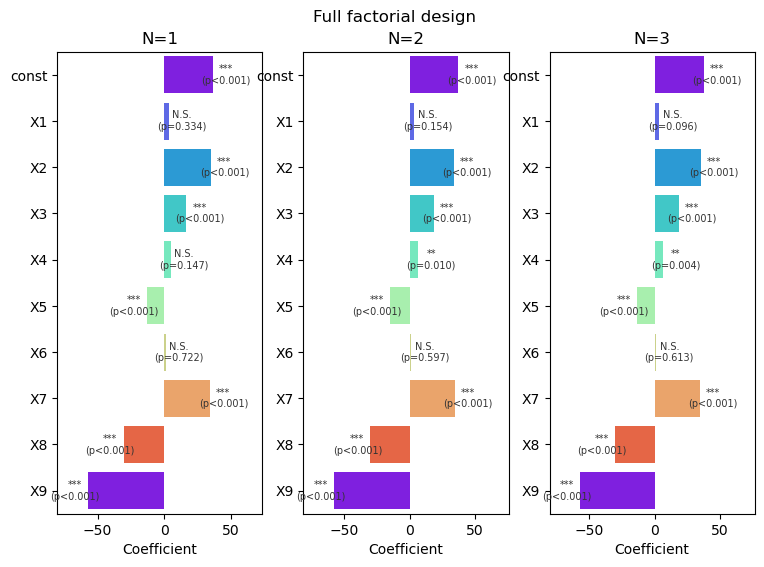

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(9, 6))

for i, a in enumerate(ax):
    model.simulate(n_rep=i + 1)
    MLR(model).plot(ax=a, cmap=sim1)

fig.suptitle(f"{model.metadata['design']} design", y=.95)

if conf.savefig:
    fig.savefig(f"{conf.out}/ff_sim_mlr", **kwarg_savefig)

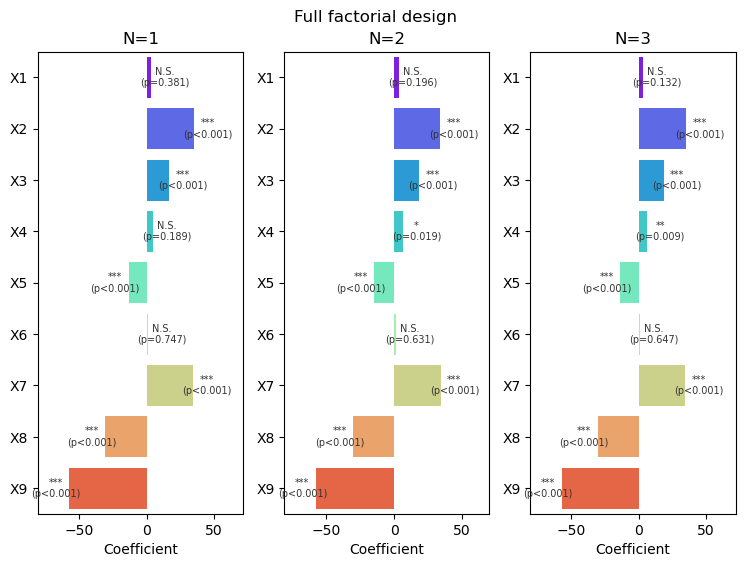

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(9, 6))

for i, a in enumerate(ax):
    model.simulate(n_rep=i + 1)
    MLR(model).plot(ax=a, cmap=sim1)

fig.suptitle(f"{model.metadata['design']} design", y=.95)

if conf.savefig:
    fig.savefig(f"{conf.out}/ff_sim_mlr", **kwarg_savefig)

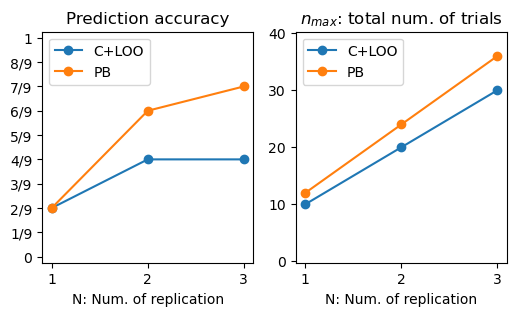

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

ax[0].plot(
    [1, 2, 3], [2, 4, 4], label="C+LOO", marker="o",
)
ax[0].plot(
    [1, 2, 3], [2, 6, 7], label="PB", marker="o",
)

ax[0].set_ylim([-.25, 9.25])
ax[0].set_yticks(np.arange(0, 10), ["0"] + [f"{i}/9" for i in np.arange(1, 9)] + ["1"])
ax[0].set(title="Prediction accuracy", xlabel="N: Num. of replication")

ax[1].plot(
    [1, 2, 3], [10, 20, 30], label="C+LOO", marker="o",
)
ax[1].plot(
    [1, 2, 3], [12, 24, 36], label="PB", marker="o",
)
ax[1].set_ylim([-.25, 40.25])
ax[1].set(title="$n_{max}$: total num. of trials", xlabel="N: Num. of replication")

[a.set_xticks(np.arange(1, 4), np.arange(1, 4)) for a in ax]
[a.legend(loc="upper left") for a in ax];

if conf.savefig:
    fig.savefig(f"{conf.out}/benchmark", **kwarg_savefig)

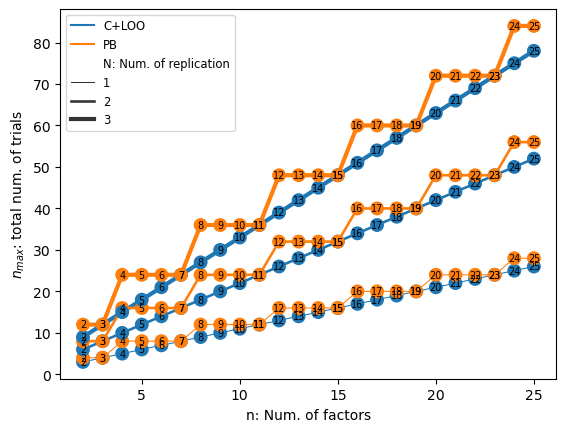

In [36]:
fig, ax = plt.subplots()

n_cloo = np.vectorize(lambda x: x + 1)
n_pb = np.vectorize(lambda x: 4 * (x // 4 + 1))
n_cloo2 = np.vectorize(lambda x: 2 * (x + 1))
n_pb2 = np.vectorize(lambda x: 8 * (x // 4 + 1))
n_cloo3 = np.vectorize(lambda x: 3 * (x + 1))
n_pb3 = np.vectorize(lambda x: 12 * (x // 4 + 1))

lim = 25

m = n[1:lim]
dat = pd.DataFrame({
    "n": np.concatenate([m] * 6),
    "nmax": np.concatenate(
        [n_cloo(m), n_pb(m)] + [2 * n_cloo(m), 2 * n_pb(m)] + [3 * n_cloo(m), 3 * n_pb(m)]
    ),
    "": (["C+LOO"] * (lim-1) + ["PB"] * (lim-1)) * 3,
    "N: Num. of replication": [1] * 2 * (lim-1) + [2] * 2 * (lim-1) + [3] * 2 * (lim-1)
})

sns.lineplot(
    data=dat, x="n", y="nmax", hue="", size="N: Num. of replication",
    marker="o"
)
sns.scatterplot(
    data=dat, x="n", y="nmax", hue="", legend=False, 
    **dict(s=100), zorder=10, linewidth=0
)

for f in [n_cloo, n_pb, n_cloo2, n_pb2, n_cloo3, n_pb3]:
    for x, y in zip(m, f(m)):
        ax.text(x, y, x, size=7, ha="center", va="center", zorder=11)

# ax.set_ylim(-.05, 1.05)
ax.legend(fontsize="small")
ax.set(ylabel="$n_{max}$: total num. of trials", xlabel="n: Num. of factors")

if conf.savefig:
        fig.savefig(f"{conf.out}/n_max", **kwarg_savefig)

In [37]:
from doe_modules.design import YCLOO

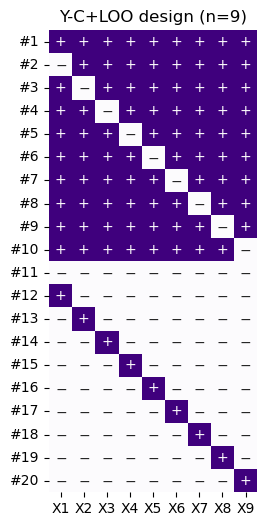

In [38]:
fig, ax = plt.subplots(figsize=(3, 6))

n_factor = 9

design_heatmap(
    design=YCLOO, n_factor=n_factor, ax=ax,
    **dsmat_pref
)

# if conf.savefig:
#     fig.savefig(f"{conf.out}/n={n_factor}", **kwarg_savefig)

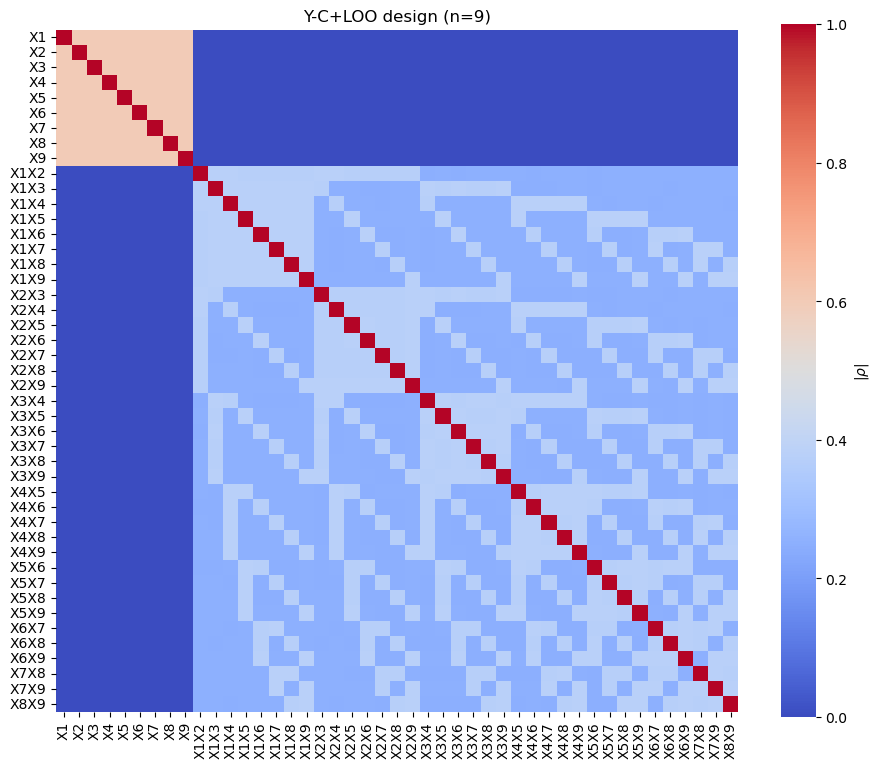

In [39]:
fig, ax = plt.subplots(figsize=(11, 9))

correlation_heatmap(
    design=YCLOO, n_factor=9, ax=ax,
    **heatmap_pref
)

# if conf.savefig:
#     fig.savefig(f"{conf.out}/corr_n={n_factor}", **kwarg_savefig)

In [7]:
exdes = YCLOO().get_exmatrix(9)()

Text(0.5, 0.93, 'YCLOO design')

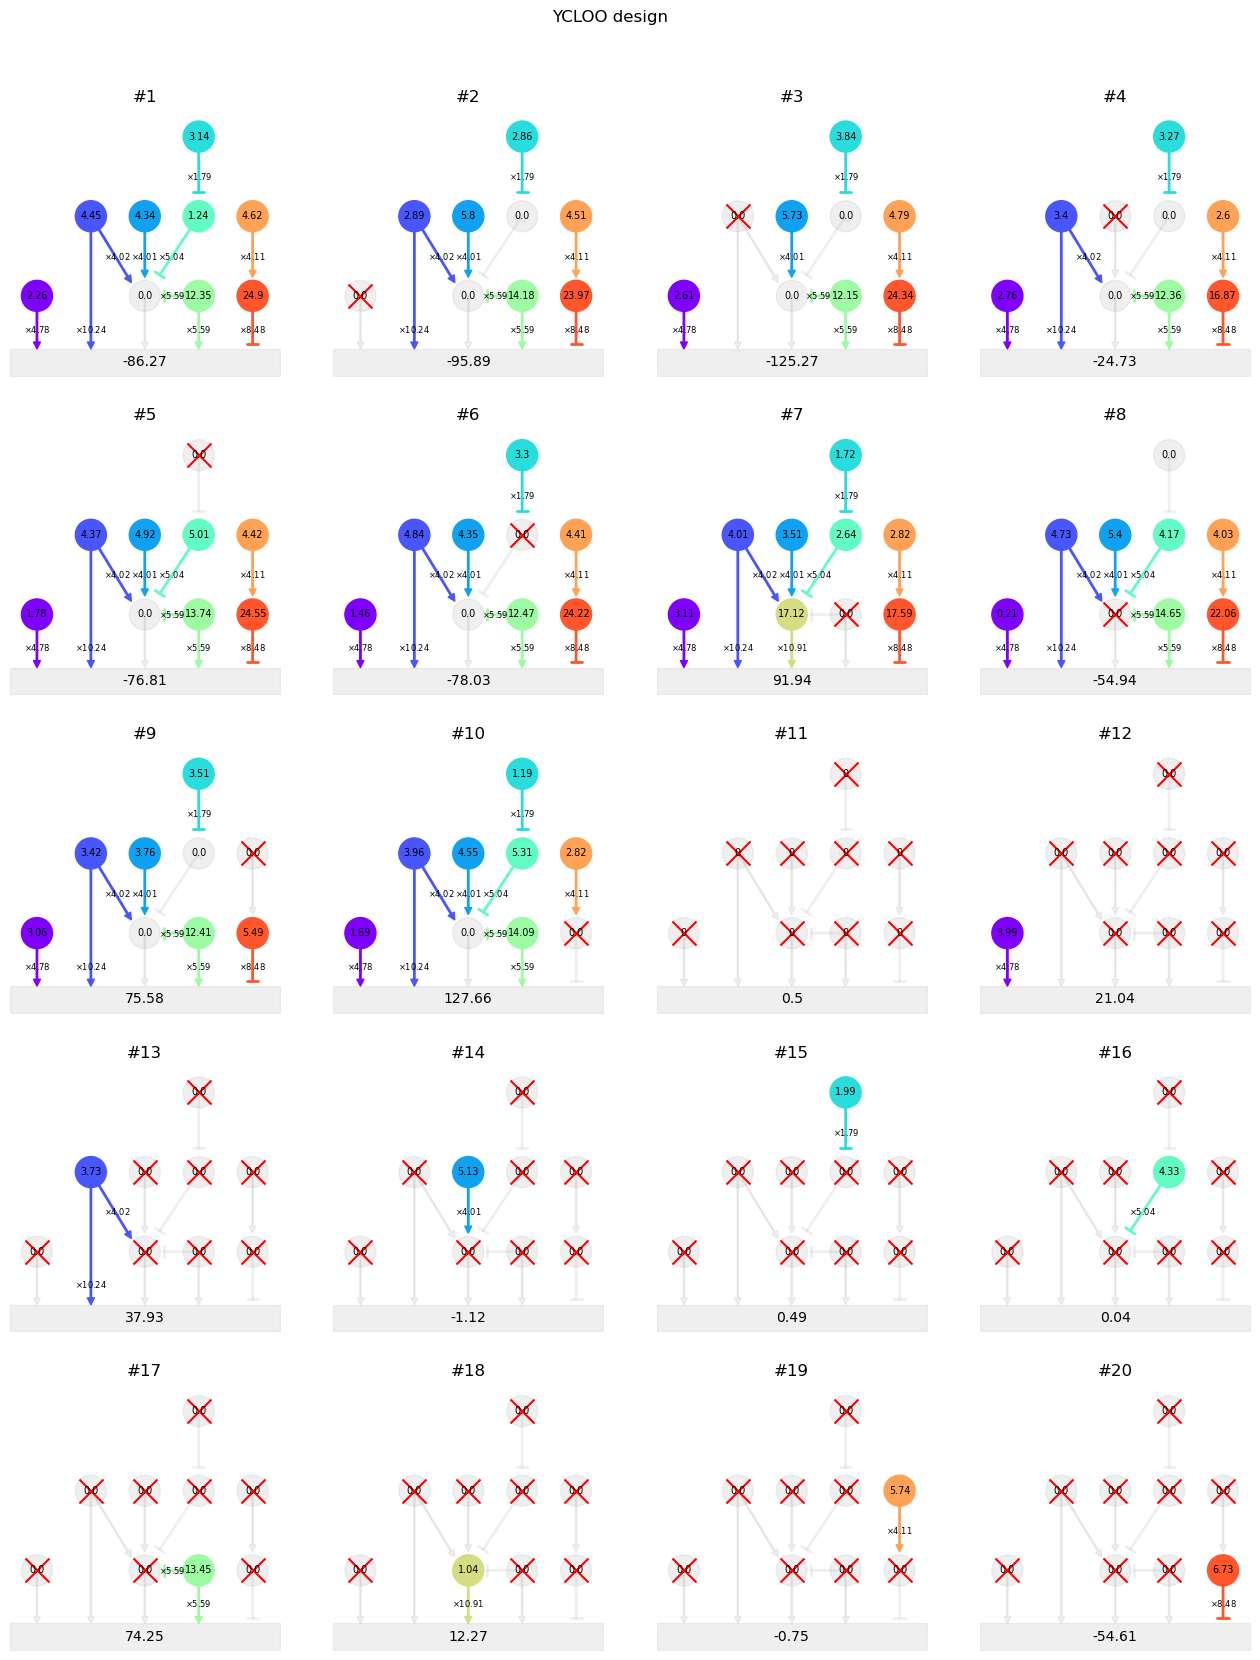

In [8]:
fig, ax = plt.subplots(5, 4, figsize=(16, 20))

model = Sim1()

np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes))
y = []

for i, s in enumerate(seeds):
    y += [
        model.run(
            design_array=exdes.iloc[i, :], 
            random_state=s
        )
    ]
    model.plot(ax=ax.ravel()[i])
    ax.ravel()[i].set(title=f"#{i + 1}")

y = np.array(y)
fig.suptitle("YCLOO design", y=.93)

# if conf.savefig:
#     fig.savefig(f"{conf.out}/pb_sim", **kwarg_savefig)

Text(0.5, 0.95, 'YCLOO design')

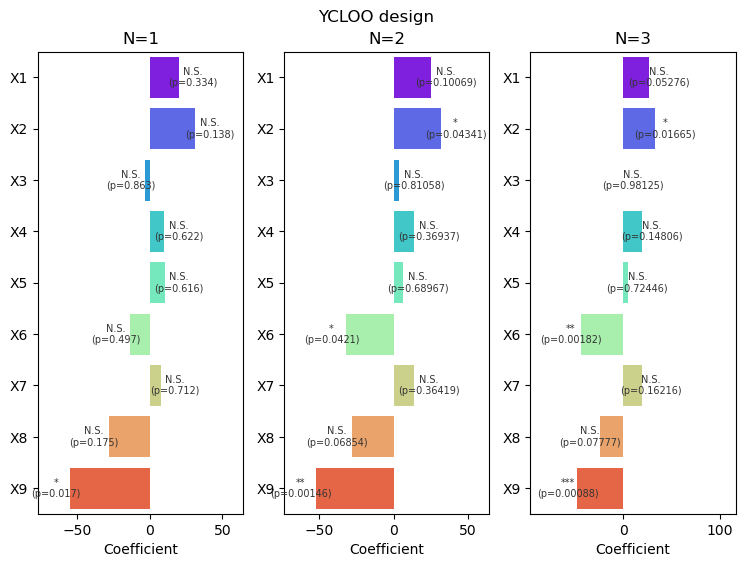

In [9]:
res = sm.OLS(y, exdes).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

fig, ax = plt.subplots(1, 3, figsize=(9, 6))

sign = lambda x: 2 * int(x >= 0) - 1

def asterisk(p) -> str:
    if p >= .05:
        return "N.S."
    elif .01 <= p < .05:
        return "*"
    elif .001 <= p < .01:
        return "**"
    else:
        return "***"

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[0]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[0].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 3)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[0].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[0].get_xlim()]))
ax[0].set(
    xlabel="Coefficient", 
    ylabel="", 
    title="N=1"
)

nrep = 2
np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes) * nrep)
y3 = []

for i, s in enumerate(seeds):
    y3 += [
        model.run(
            design_array=pd.concat([exdes] * nrep).iloc[i, :], 
            random_state=s
        )
    ]

y3 = np.array(y3)
res = sm.OLS(y3, pd.concat([exdes] * nrep)).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[1]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[1].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 5)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[1].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[1].get_xlim()]))
ax[1].set(
    xlabel="Coefficient", ylabel="", 
    title=f"N={nrep}"
)


nrep = 3
np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes) * nrep)
y3 = []

for i, s in enumerate(seeds):
    y3 += [
        model.run(
            design_array=pd.concat([exdes] * nrep).iloc[i, :], 
            random_state=s
        )
    ]

y3 = np.array(y3)
res = sm.OLS(y3, pd.concat([exdes] * nrep)).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[-1]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[-1].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 5)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[-1].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[1].get_xlim()]))
ax[-1].set(
    xlabel="Coefficient", ylabel="", 
    title=f"N={nrep}"
)

fig.suptitle("YCLOO design", y=.95)

# if conf.savefig:
#     fig.savefig(f"{conf.out}/pb_sim_mlr", **kwarg_savefig)

Text(0.5, 0.93, 'PB design (N=3)')

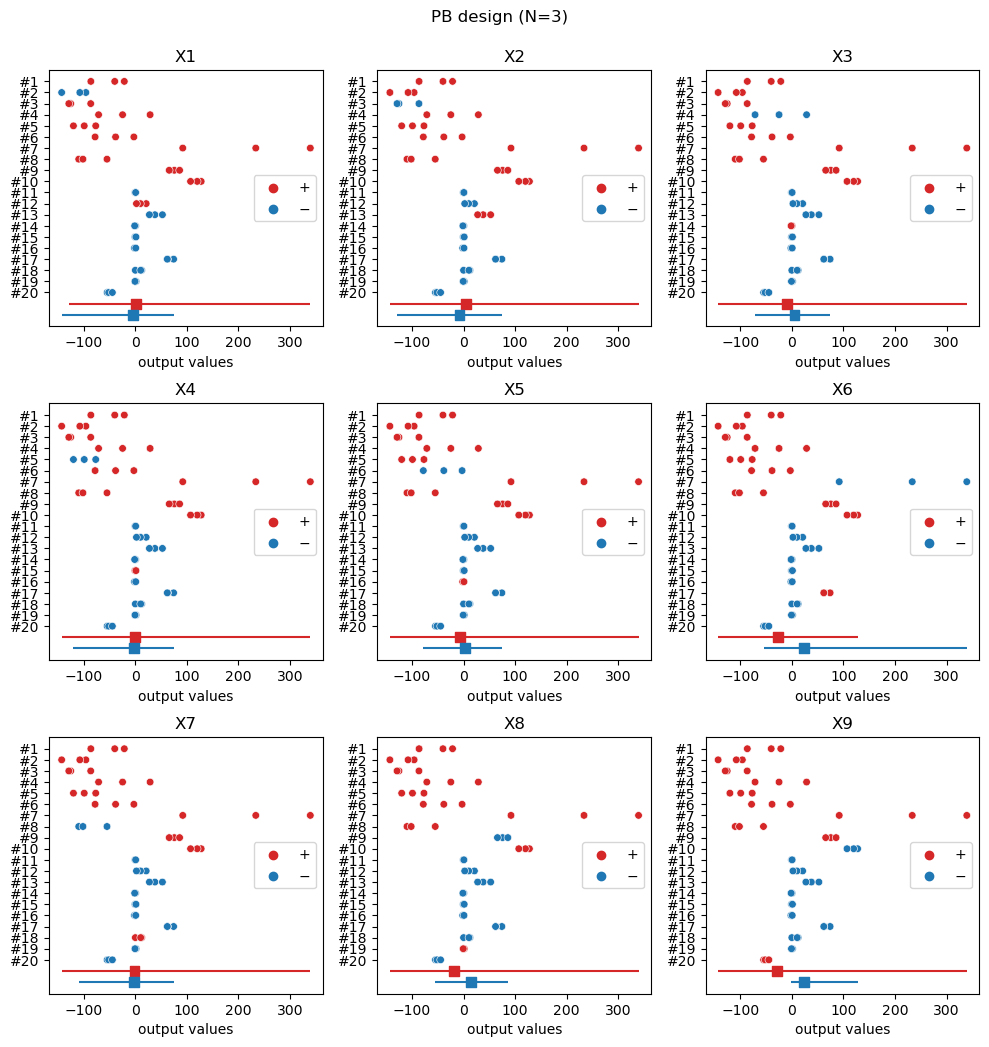

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=.3)

for i, a in enumerate(ax.ravel()):
    factor = [f"X{i + 1}" for i in range(9)][i]
    df_temp = pd.DataFrame({
        factor: [["$-$", "$+$"][
                v
            ] for v in (
                    (1 + pd.concat([exdes] * nrep).loc[:, factor]) / 2
                ).astype(int)
            ],
        "idx": pd.concat([exdes] * nrep).reset_index().loc[:, "index"]
    })
    sns.scatterplot(
        data=df_temp,
        y="idx", x=y3, s=30, hue=factor, 
        palette={"$+$": "C3", "$-$":"C0"}, ax=a
    )

    mean_pos = np.mean(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == 1)])
    mean_neg = np.mean(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == -1)])
    max_pos = np.max(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == 1)])
    max_neg = np.max(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == -1)])
    min_pos = np.min(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == 1)])
    min_neg = np.min(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == -1)])

    a.scatter(
        x=[mean_pos, mean_neg],
        y=[20, 21], marker=",", color=["C3", "C0"], s=50
    )

    a.hlines(20, min_pos, max_pos, color="C3")
    a.hlines(21, min_neg, max_neg, color="C0")
    a.set(
        xlabel="output values", ylabel="", 
        title=factor
    )
    handles, labels = a.get_legend_handles_labels()
    a.legend(
        handles = handles if df_temp.loc[:, factor][0] == "$+$" else handles[::-1],
        labels = labels if df_temp.loc[:, factor][0] == "$+$" else labels[::-1],
        loc="center right", bbox_to_anchor=(1, .5))

fig.suptitle(f"PB design (N={nrep})", y=.93)

# if conf.savefig:
#     fig.savefig(f"{conf.out}/pb_sim_res_n={nrep}", **kwarg_savefig)

In [11]:
np.linalg.det(
    np.linalg.inv(CLOO().get_exmatrix(9)().T @ CLOO().get_exmatrix(9)())
)

2.6308257004310387e-07

In [12]:
np.linalg.det(
    np.linalg.inv(
        FullFactorial().get_exmatrix(9)().T @ FullFactorial().get_exmatrix(9)())
)

4.1359030627651016e-25

In [13]:
np.linalg.det(
    np.linalg.inv(
        PlackettBurman().get_exmatrix(9)().T @ PlackettBurman().get_exmatrix(9)())
)

1.9380669946781452e-10

In [14]:
np.linalg.det(
    np.linalg.inv(YCLOO().get_exmatrix(9)().T @ YCLOO().get_exmatrix(9)())
)

5.138331446154368e-10

In [15]:
np.fromiter({"a": 1, "b": 2, "c": 3}.values(), int)

array([1, 2, 3])

In [40]:
def d_c(X: np.ndarray) -> float:
    return np.linalg.det(np.linalg.inv(X.T @ X))

In [54]:
def d_c2(X: np.ndarray) -> float:
    return np.linalg.det(X.T @ X)

In [43]:
FullFactorial().get_exmatrix(9).values

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1,  1, -1],
       ...,
       [ 1,  1,  1, ...,  1, -1,  1],
       [ 1,  1,  1, ...,  1,  1, -1],
       [ 1,  1,  1, ...,  1,  1,  1]])

In [56]:
moge.T @ moge

array([[4., 0., 0.],
       [0., 4., 0.],
       [0., 0., 4.]])

In [52]:
moge = np.hstack([FullFactorial().get_exmatrix(2).values, np.ones(4).reshape(-1, 1)])

In [58]:
d_c(moge)

0.015625000000000007

In [59]:
1 / 64

0.015625

In [57]:
d_c2(moge)

63.99999999999998

In [95]:
from itertools import product, tee
import optuna
from doe_modules.design import DesignMatrix, DOE

def d_criterion(X: np.ndarray) -> float:
    try: 
        d = np.linalg.det(np.linalg.inv(X.T @ X))
    except np.linalg.LinAlgError:
        d = np.linalg.det(np.linalg.pinv(X.T @ X))
    return d

def d_optimize(
    dsmatrix: DesignMatrix,
    n_add: int = 0,
    n_total: int = None
):
    if n_add == 0 and n_total is not None and isinstance(n_total, int):
        assert n_total > dsmatrix.shape[0], \
            f"Invalid n_total value: n_total={n_total} should be an integer larger than the original number of trials (>{dsmatrix.shape[0]})"
        n_add = n_total - dsmatrix.shape[0]
    assert isinstance(n_add, int) and n_add > 0, \
        f"Invalid n_add value: n_add={n_add} should be a positive integer"
    
    candidates = tee(
        map(
            lambda tup: np.concatenate([dsmatrix.values, np.fromiter(tup, int).reshape(n_add, -1)]),
            product(*[[1, -1]] * n_add * dsmatrix.shape[1])
        ), 
        2
    )
    
    d_vals = map(d_criterion, candidates[0])
    optimal_idx = np.argmin(np.fromiter(d_vals, float)).astype(int)
    
    for i, m in enumerate(candidates[1]):
        if i == optimal_idx:
            return np.array(m)

class DOptimization(DOE):
    def __init__(self, base: DOE):
        super().__init__()
        self.base = base

    def get_exmatrix(
        self, 
        n_factor: int,
        n_add: int = 0,
        n_total: int = None,
        tpe: bool = False,
        **kwargs
    ) -> DesignMatrix:
        return self.opt_exmatrix(
            n_factor=n_factor, n_add=n_add, n_total=n_total, **kwargs
        ) if tpe else DesignMatrix(
            d_optimize(
                self.base().get_exmatrix(n_factor), 
                n_add=n_add, n_total=n_total
            )
        )

    def opt_exmatrix(
        self, 
        n_factor: int,
        n_add: int = 0,
        n_total: int = None,
        random_state: int = 0,
        n_trials: int = 100,
        logging: str = "FATAL"
    ) -> DesignMatrix:
        eval(f"optuna.logging.set_verbosity(optuna.logging.{logging})")
        dsarr = self.base().get_exmatrix(n_factor).values
        if n_add == 0 and n_total is not None and isinstance(n_total, int):
            assert n_total > dsarr.shape[0], \
                f"Invalid n_total value: n_total={n_total} should be an integer larger than the original number of trials (>{dsarr.shape[0]})"
            n_add = n_total - dsarr.shape[0]
        assert isinstance(n_add, int) and n_add > 0, \
            f"Invalid n_add value: n_add={n_add} should be a positive integer"

        def obj(trial):
            names = np.ravel([[f"{i}-{j + 1}" for i in range(n_factor)] for j in range(n_add)]).tolist()
            factors = {name: trial.suggest_categorical(name, [1, -1]) for name in names}
            mat = np.concatenate([dsarr, np.fromiter(factors.values(), int).reshape(n_add, -1)])
            return d_criterion(mat)

        study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=random_state))
        study.optimize(obj, n_trials=n_trials)
        return DesignMatrix(
            np.concatenate([dsarr, np.fromiter(study.best_params.values(), int).reshape(n_add, -1)])
        )


class DOCLOO(DOptimization):
    def __init__(self):
        super().__init__(base=CLOO)

    def get_exmatrix(
        self, 
        n_factor: int,
        n_add: int = 0,
        n_total: int = None,
        tpe: bool = False,
        **kwargs
    ) -> DesignMatrix:
        return super().get_exmatrix(
            n_factor=n_factor, n_add=n_add, n_total=n_total,
            tpe=tpe, **kwargs
        )

class Blank(DOE):
    def __init__(self):
        super().__init__()

    def get_exmatrix(
        self, 
        n_factor: int
    ) -> DesignMatrix:
        return DesignMatrix(np.array([[]] * n_factor).T)

class Dry(DOE):
    def __init__(self):
        super().__init__()

    def get_exmatrix(
        self, 
        n_factor: int
    ) -> DesignMatrix:
        return DesignMatrix(np.ones(n_factor).reshape(1, -1))

    
class FullDO(DOptimization):
    def __init__(self):
        super().__init__(base=Blank)

    def get_exmatrix(
        self, 
        n_factor: int,
        n_add: int = 0,
        n_total: int = None,
        tpe: bool = False,
        **kwargs
    ) -> DesignMatrix:
        return super().get_exmatrix(
            n_factor=n_factor, n_add=n_add, n_total=n_total,
            tpe=tpe, **kwargs
        )

In [34]:
np.array([[]] * 9).T

array([], shape=(0, 9), dtype=float64)

In [35]:
DesignMatrix(np.array([[]] * 9).T)

In [23]:
%%time

DOCLOO().get_exmatrix(n_factor=9, n_total=12, tpe=False)

CPU times: user 34.9 s, sys: 52 s, total: 1min 26s
Wall time: 10.9 s


In [58]:
%%time

DOCLOO().get_exmatrix(n_factor=9, n_total=15, tpe=True)

CPU times: user 16.2 s, sys: 24.4 s, total: 40.5 s
Wall time: 5.1 s


[Text(0.5, 1.0, 'Y-C+LOO design (n=9)')]

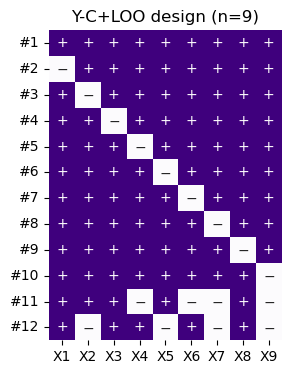

In [32]:
fig, ax = plt.subplots(figsize=(3, 6))

n_factor = 9

design_heatmap(
    design=DOCLOO, n_factor=n_factor, ax=ax,
    design_kws={"n_total": 12},
    **dsmat_pref
)

ax.set(title=f"Y-C+LOO design (n={n_factor})")

# if conf.savefig:
#     fig.savefig(f"{conf.out}/n={n_factor}", **kwarg_savefig)

[Text(0.5, 1.0, 'Y-C+LOO design (n=9)')]

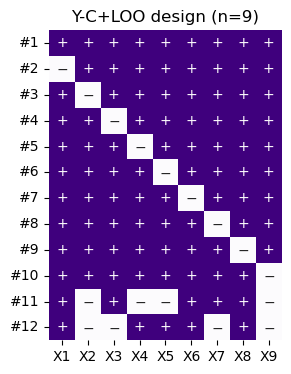

In [36]:
fig, ax = plt.subplots(figsize=(3, 6))

n_factor = 9

design_heatmap(
    design=DOCLOO, n_factor=n_factor, ax=ax,
    design_kws={"n_total": 12, "tpe": True},
    **dsmat_pref
)

ax.set(title=f"Y-C+LOO design (n={n_factor})")

# if conf.savefig:
#     fig.savefig(f"{conf.out}/n={n_factor}", **kwarg_savefig)

[Text(0.5, 1.0, 'Y-C+LOO design (n=9)')]

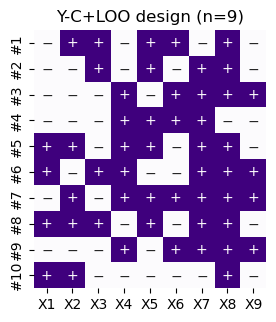

In [60]:
fig, ax = plt.subplots(figsize=(3, 6))

n_factor = 9

design_heatmap(
    design=FullDO, n_factor=n_factor, ax=ax,
    design_kws={"n_total": 10, "tpe": True},
    **dsmat_pref
)

ax.set(title=f"Y-C+LOO design (n={n_factor})")

# if conf.savefig:
#     fig.savefig(f"{conf.out}/n={n_factor}", **kwarg_savefig)

[Text(0.5, 1.0, 'YC+LOO design (n=9)')]

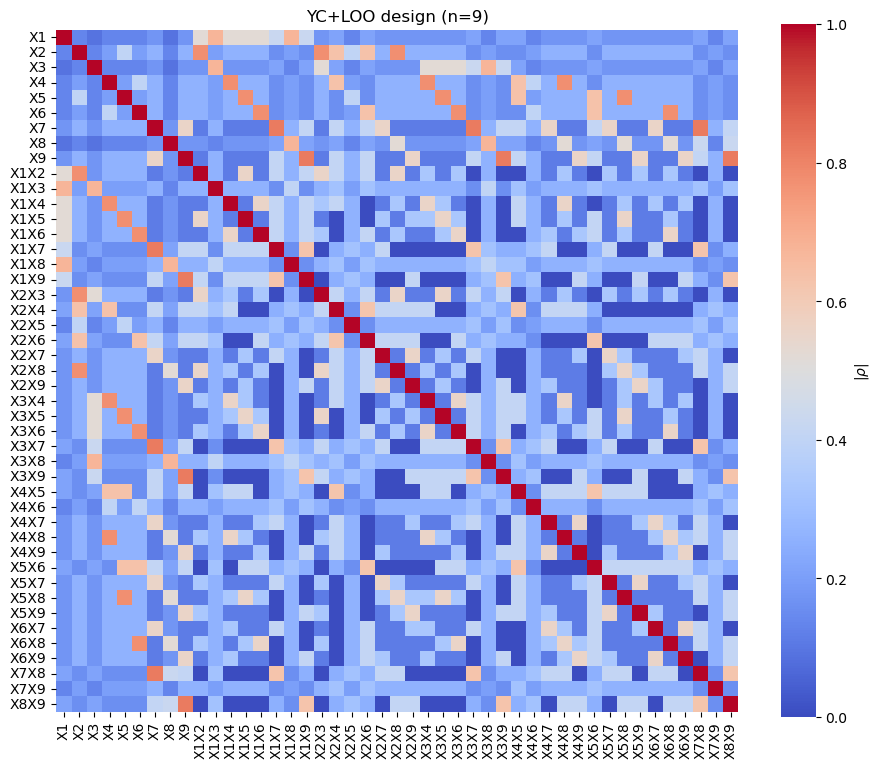

In [10]:
fig, ax = plt.subplots(figsize=(11, 9))

correlation_heatmap(
    design=DOCLOO, n_factor=9, ax=ax,
    design_kws={"n_total": 12},
    **heatmap_pref
)

ax.set(title=f"YC+LOO design (n={n_factor})")

# if conf.savefig:
#     fig.savefig(f"{conf.out}/corr_n={n_factor}", **kwarg_savefig)

[Text(0.5, 1.0, 'YC+LOO design (n=9)')]

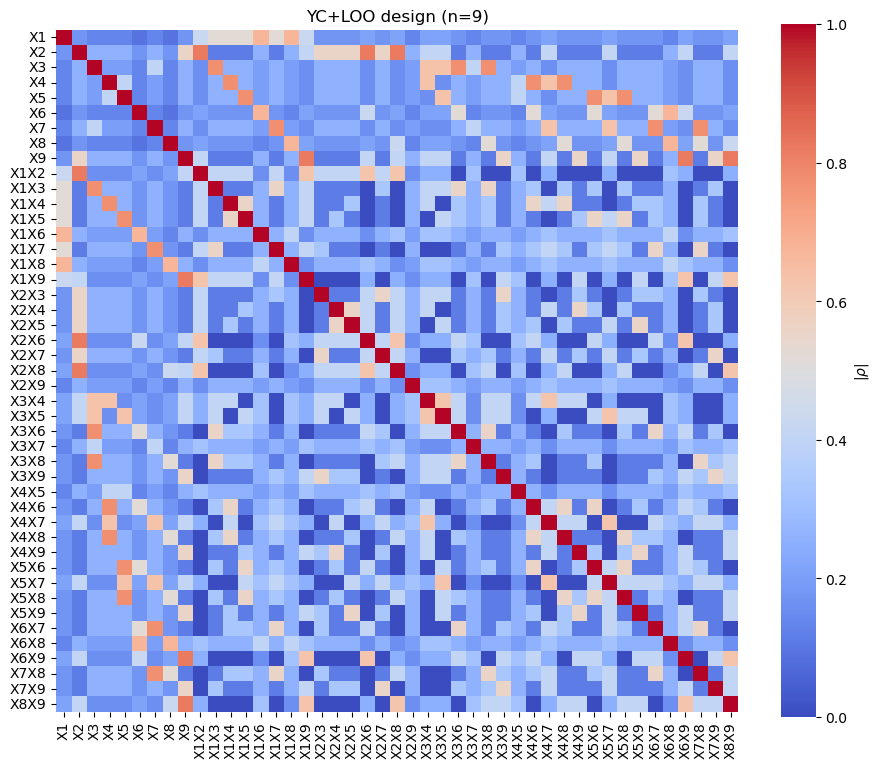

In [39]:
fig, ax = plt.subplots(figsize=(11, 9))

correlation_heatmap(
    design=DOCLOO, n_factor=9, ax=ax,
    design_kws={"n_total": 12, "tpe": True},
    **heatmap_pref
)

ax.set(title=f"YC+LOO design (n={n_factor})")

# if conf.savefig:
#     fig.savefig(f"{conf.out}/corr_n={n_factor}", **kwarg_savefig)

[Text(0.5, 1.0, 'YC+LOO design (n=9)')]

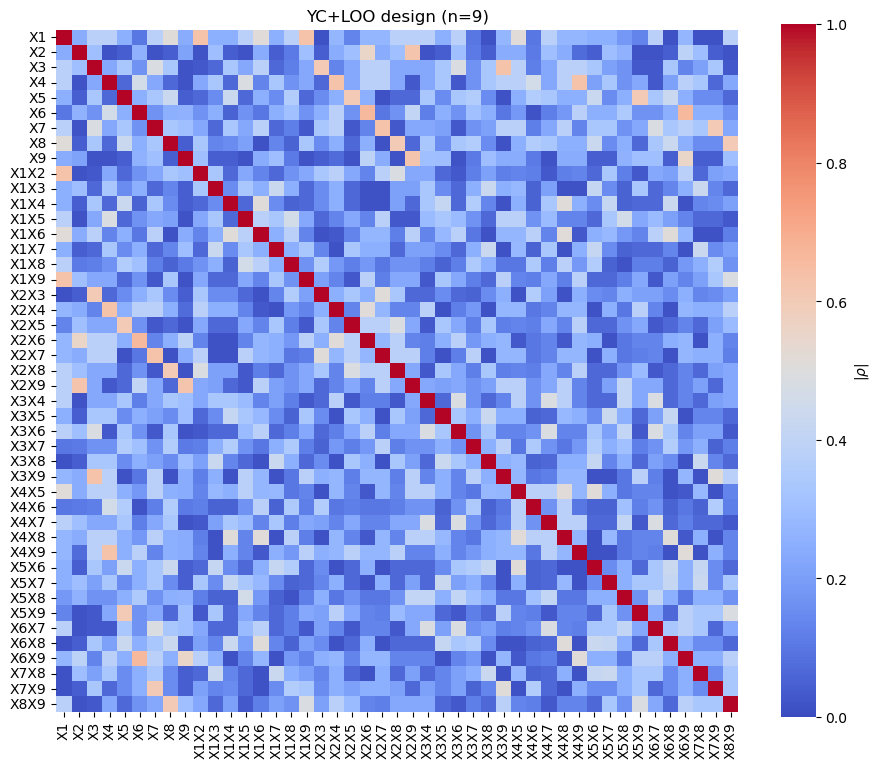

In [120]:
fig, ax = plt.subplots(figsize=(11, 9))

correlation_heatmap(
    design=DOCLOO, n_factor=9, ax=ax,
    design_kws={"n_total": 17, "tpe": True},
    **heatmap_pref
)

ax.set(title=f"YC+LOO design (n={n_factor})")

# if conf.savefig:
#     fig.savefig(f"{conf.out}/corr_n={n_factor}", **kwarg_savefig)

[Text(0.5, 1.0, 'YC+LOO design (n=9)')]

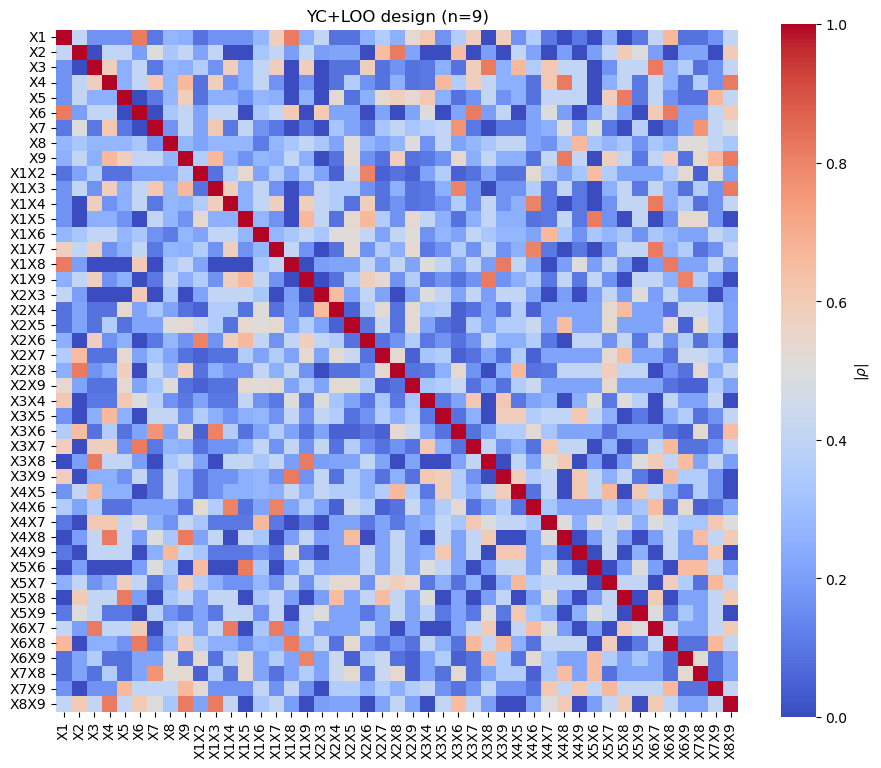

In [77]:
fig, ax = plt.subplots(figsize=(11, 9))

correlation_heatmap(
    design=FullDO, n_factor=9, ax=ax,
    design_kws={"n_total": 10, "tpe": True},
    **heatmap_pref
)

ax.set(title=f"YC+LOO design (n={n_factor})")

# if conf.savefig:
#     fig.savefig(f"{conf.out}/corr_n={n_factor}", **kwarg_savefig)

In [99]:
lst_mat = [
    CLOO().get_exmatrix(9).values
] + [
    DOCLOO().get_exmatrix(9, i + 1, tpe=True).values for i in range(14)
]

In [100]:
lst_pb = [
    PlackettBurman().get_exmatrix(9).values
] + [
    DOptimization(
        base=PlackettBurman
    ).get_exmatrix(9, i + 1, tpe=True).values for i in range(12)
]

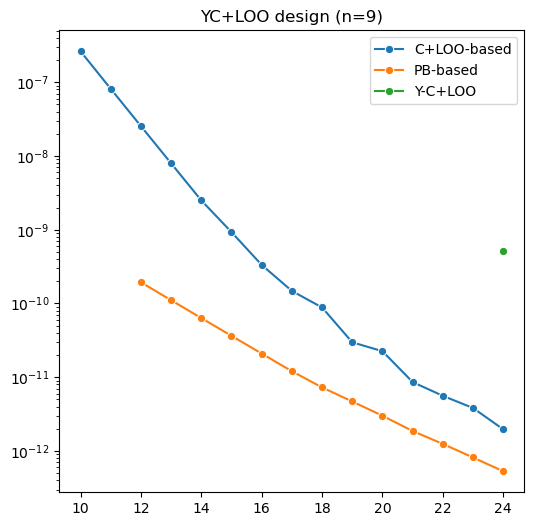

In [119]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.lineplot(
    x=np.arange(10, 25),
    y=np.fromiter(map(d_criterion, lst_mat), float),
    marker="o", label="C+LOO-based"
)

sns.lineplot(
    x=np.arange(12, 25),
    y=np.fromiter(map(d_criterion, lst_pb), float),
    marker="o", label="PB-based"
)

sns.lineplot(
    x=[24],
    y=[d_criterion(YCLOO().get_exmatrix(9).values)],
    marker="o", label="Y-C+LOO"
)

ax.set(title=f"YC+LOO design (n={n_factor})")
ax.set_yscale("log")

# if conf.savefig:
#     fig.savefig(f"{conf.out}/corr_n={n_factor}", **kwarg_savefig)

In [37]:
d_criterion(
    DOCLOO().get_exmatrix(9, 2)()
)

2.5431315104166496e-08

In [38]:
d_criterion(
    DOCLOO().get_exmatrix(9, 2, tpe=True)()
)

2.5431315104166586e-08

In [27]:
d_criterion(CLOO().get_exmatrix(9)())

2.6308257004310387e-07

In [131]:
exdes = DOCLOO().get_exmatrix(9, n_total=24, tpe=True)()

np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes))
y = []

for i, s in enumerate(seeds):
    y += [
        model.run(
            design_array=exdes.iloc[i, :], 
            random_state=s
        )
    ]
y = np.array(y)

fig, ax = plt.subplots(6, 3, figsize=(12, 18))

model = Sim1()

np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes))
y = []

for i, s in enumerate(seeds):
    y += [
        model.run(
            design_array=exdes.iloc[i, :], 
            random_state=s
        )
    ]
    model.plot(ax=ax.ravel()[i])
    ax.ravel()[i].set(title=f"#{i + 1}")

y = np.array(y)
fig.suptitle("DO-C+LOO design", y=.93)

Text(0.5, 0.95, 'DO-C+LOO design')

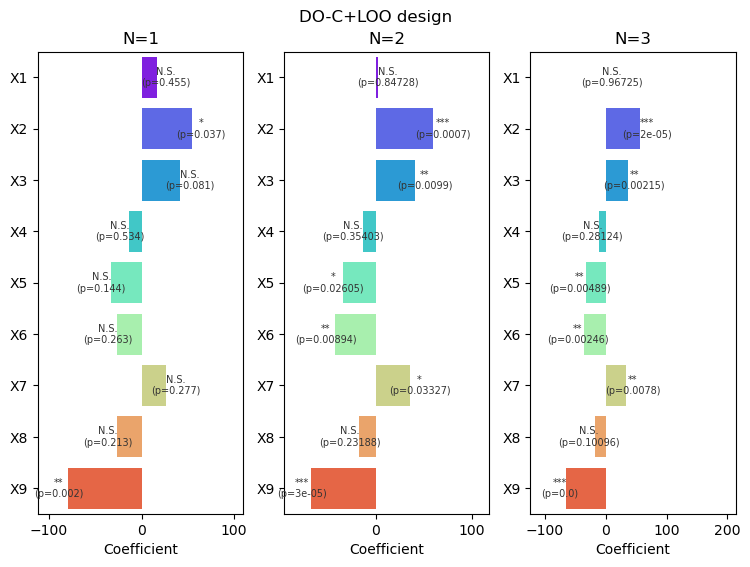

In [132]:
res = sm.OLS(y, exdes).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

fig, ax = plt.subplots(1, 3, figsize=(9, 6))

sign = lambda x: 2 * int(x >= 0) - 1

def asterisk(p) -> str:
    if p >= .05:
        return "N.S."
    elif .01 <= p < .05:
        return "*"
    elif .001 <= p < .01:
        return "**"
    else:
        return "***"

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[0]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[0].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 3)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[0].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[0].get_xlim()]))
ax[0].set(
    xlabel="Coefficient", 
    ylabel="", 
    title="N=1"
)

nrep = 2
np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes) * nrep)
y3 = []

for i, s in enumerate(seeds):
    y3 += [
        model.run(
            design_array=pd.concat([exdes] * nrep).iloc[i, :], 
            random_state=s
        )
    ]

y3 = np.array(y3)
res = sm.OLS(y3, pd.concat([exdes] * nrep)).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[1]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[1].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 5)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[1].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[1].get_xlim()]))
ax[1].set(
    xlabel="Coefficient", ylabel="", 
    title=f"N={nrep}"
)


nrep = 3
np.random.seed(0)
seeds = np.random.randint(0, 2**32, len(exdes) * nrep)
y3 = []

for i, s in enumerate(seeds):
    y3 += [
        model.run(
            design_array=pd.concat([exdes] * nrep).iloc[i, :], 
            random_state=s
        )
    ]

y3 = np.array(y3)
res = sm.OLS(y3, pd.concat([exdes] * nrep)).fit()
sumup = pd.DataFrame(res.params, columns=["coef"]).assign(p=res.pvalues).reset_index()

sns.barplot(
    data=sumup, y="index", x="coef", palette=[plt.cm.rainbow(i/9) for i in range(9)],
    ax=ax[-1]
)

for i, c, p in zip(sumup.index, sumup.coef, sumup.p):
    ax[-1].text(
        sign(c) * (abs(c) + 10), i, asterisk(p) + f"\n(p={round(p, 5)})", 
        color=".2", size=7,
        ha="center", va="center"
    )

ax[-1].set_xlim(np.array([1.3, 1.8]) * np.array([*ax[1].get_xlim()]))
ax[-1].set(
    xlabel="Coefficient", ylabel="", 
    title=f"N={nrep}"
)

fig.suptitle("DO-C+LOO design", y=.95)

# if conf.savefig:
#     fig.savefig(f"{conf.out}/pb_sim_mlr", **kwarg_savefig)

Text(0.5, 0.93, 'PB design (N=3)')

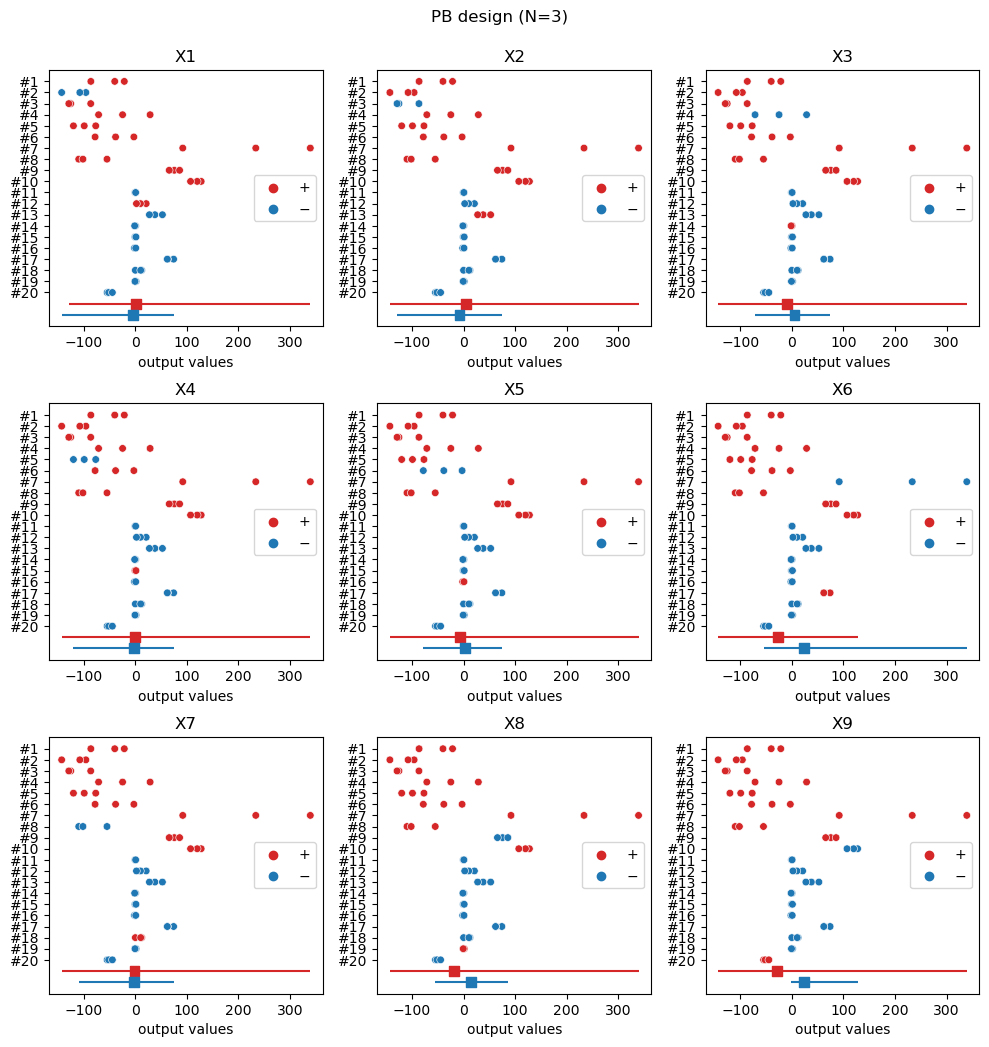

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=.3)

for i, a in enumerate(ax.ravel()):
    factor = [f"X{i + 1}" for i in range(9)][i]
    df_temp = pd.DataFrame({
        factor: [["$-$", "$+$"][
                v
            ] for v in (
                    (1 + pd.concat([exdes] * nrep).loc[:, factor]) / 2
                ).astype(int)
            ],
        "idx": pd.concat([exdes] * nrep).reset_index().loc[:, "index"]
    })
    sns.scatterplot(
        data=df_temp,
        y="idx", x=y3, s=30, hue=factor, 
        palette={"$+$": "C3", "$-$":"C0"}, ax=a
    )

    mean_pos = np.mean(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == 1)])
    mean_neg = np.mean(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == -1)])
    max_pos = np.max(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == 1)])
    max_neg = np.max(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == -1)])
    min_pos = np.min(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == 1)])
    min_neg = np.min(y3[np.where(pd.concat([exdes] * nrep).loc[:, factor] == -1)])

    a.scatter(
        x=[mean_pos, mean_neg],
        y=[20, 21], marker=",", color=["C3", "C0"], s=50
    )

    a.hlines(20, min_pos, max_pos, color="C3")
    a.hlines(21, min_neg, max_neg, color="C0")
    a.set(
        xlabel="output values", ylabel="", 
        title=factor
    )
    handles, labels = a.get_legend_handles_labels()
    a.legend(
        handles = handles if df_temp.loc[:, factor][0] == "$+$" else handles[::-1],
        labels = labels if df_temp.loc[:, factor][0] == "$+$" else labels[::-1],
        loc="center right", bbox_to_anchor=(1, .5))

fig.suptitle(f"PB design (N={nrep})", y=.93)

# if conf.savefig:
#     fig.savefig(f"{conf.out}/pb_sim_res_n={nrep}", **kwarg_savefig)

In [53]:
np.fromiter((1, 1), int).reshape(1, -1)

array([[1, 1]])

In [69]:
np.concatenate([CLOO().get_exmatrix(2).matrix, np.array([[1, 1]])])

array([[ 1.,  1.],
       [-1.,  1.],
       [ 1., -1.],
       [ 1.,  1.]])

In [72]:
d_optimize(CLOO().get_exmatrix(9), n_add=2)

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.],
       [ 1.,  1.,  1., -1.,  1., -1., -1.,  1., -1.],
       [ 1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.]])

In [27]:
list(d_optimize(CLOO().get_exmatrix(2), n_add=1))

[0.0625, 0.08333333333333333, 0.08333333333333333, 0.0625]

In [29]:
np.argmin(list(d_optimize(CLOO().get_exmatrix(2), n_add=1)))

0

In [53]:
type(CLOO().get_exmatrix(9)())

pandas.core.frame.DataFrame

In [56]:
product(*[[1, -1]] * 5)

In [57]:
for i, m in enumerate(product(*[[1, -1]] * 5)):
    print(i, m)

0 (1, 1, 1, 1, 1)
1 (1, 1, 1, 1, -1)
2 (1, 1, 1, -1, 1)
3 (1, 1, 1, -1, -1)
4 (1, 1, -1, 1, 1)
5 (1, 1, -1, 1, -1)
6 (1, 1, -1, -1, 1)
7 (1, 1, -1, -1, -1)
8 (1, -1, 1, 1, 1)
9 (1, -1, 1, 1, -1)
10 (1, -1, 1, -1, 1)
11 (1, -1, 1, -1, -1)
12 (1, -1, -1, 1, 1)
13 (1, -1, -1, 1, -1)
14 (1, -1, -1, -1, 1)
15 (1, -1, -1, -1, -1)
16 (-1, 1, 1, 1, 1)
17 (-1, 1, 1, 1, -1)
18 (-1, 1, 1, -1, 1)
19 (-1, 1, 1, -1, -1)
20 (-1, 1, -1, 1, 1)
21 (-1, 1, -1, 1, -1)
22 (-1, 1, -1, -1, 1)
23 (-1, 1, -1, -1, -1)
24 (-1, -1, 1, 1, 1)
25 (-1, -1, 1, 1, -1)
26 (-1, -1, 1, -1, 1)
27 (-1, -1, 1, -1, -1)
28 (-1, -1, -1, 1, 1)
29 (-1, -1, -1, 1, -1)
30 (-1, -1, -1, -1, 1)
31 (-1, -1, -1, -1, -1)


In [41]:
[["A", "B"]] * 5

[['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B'], ['A', 'B']]

In [8]:
def hoge(**kwargs):
    if "moge" not in kwargs:
        kwargs = {**kwargs, "moge": 1}
    return kwargs

In [9]:
hoge(a=1)

{'a': 1, 'moge': 1}